In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

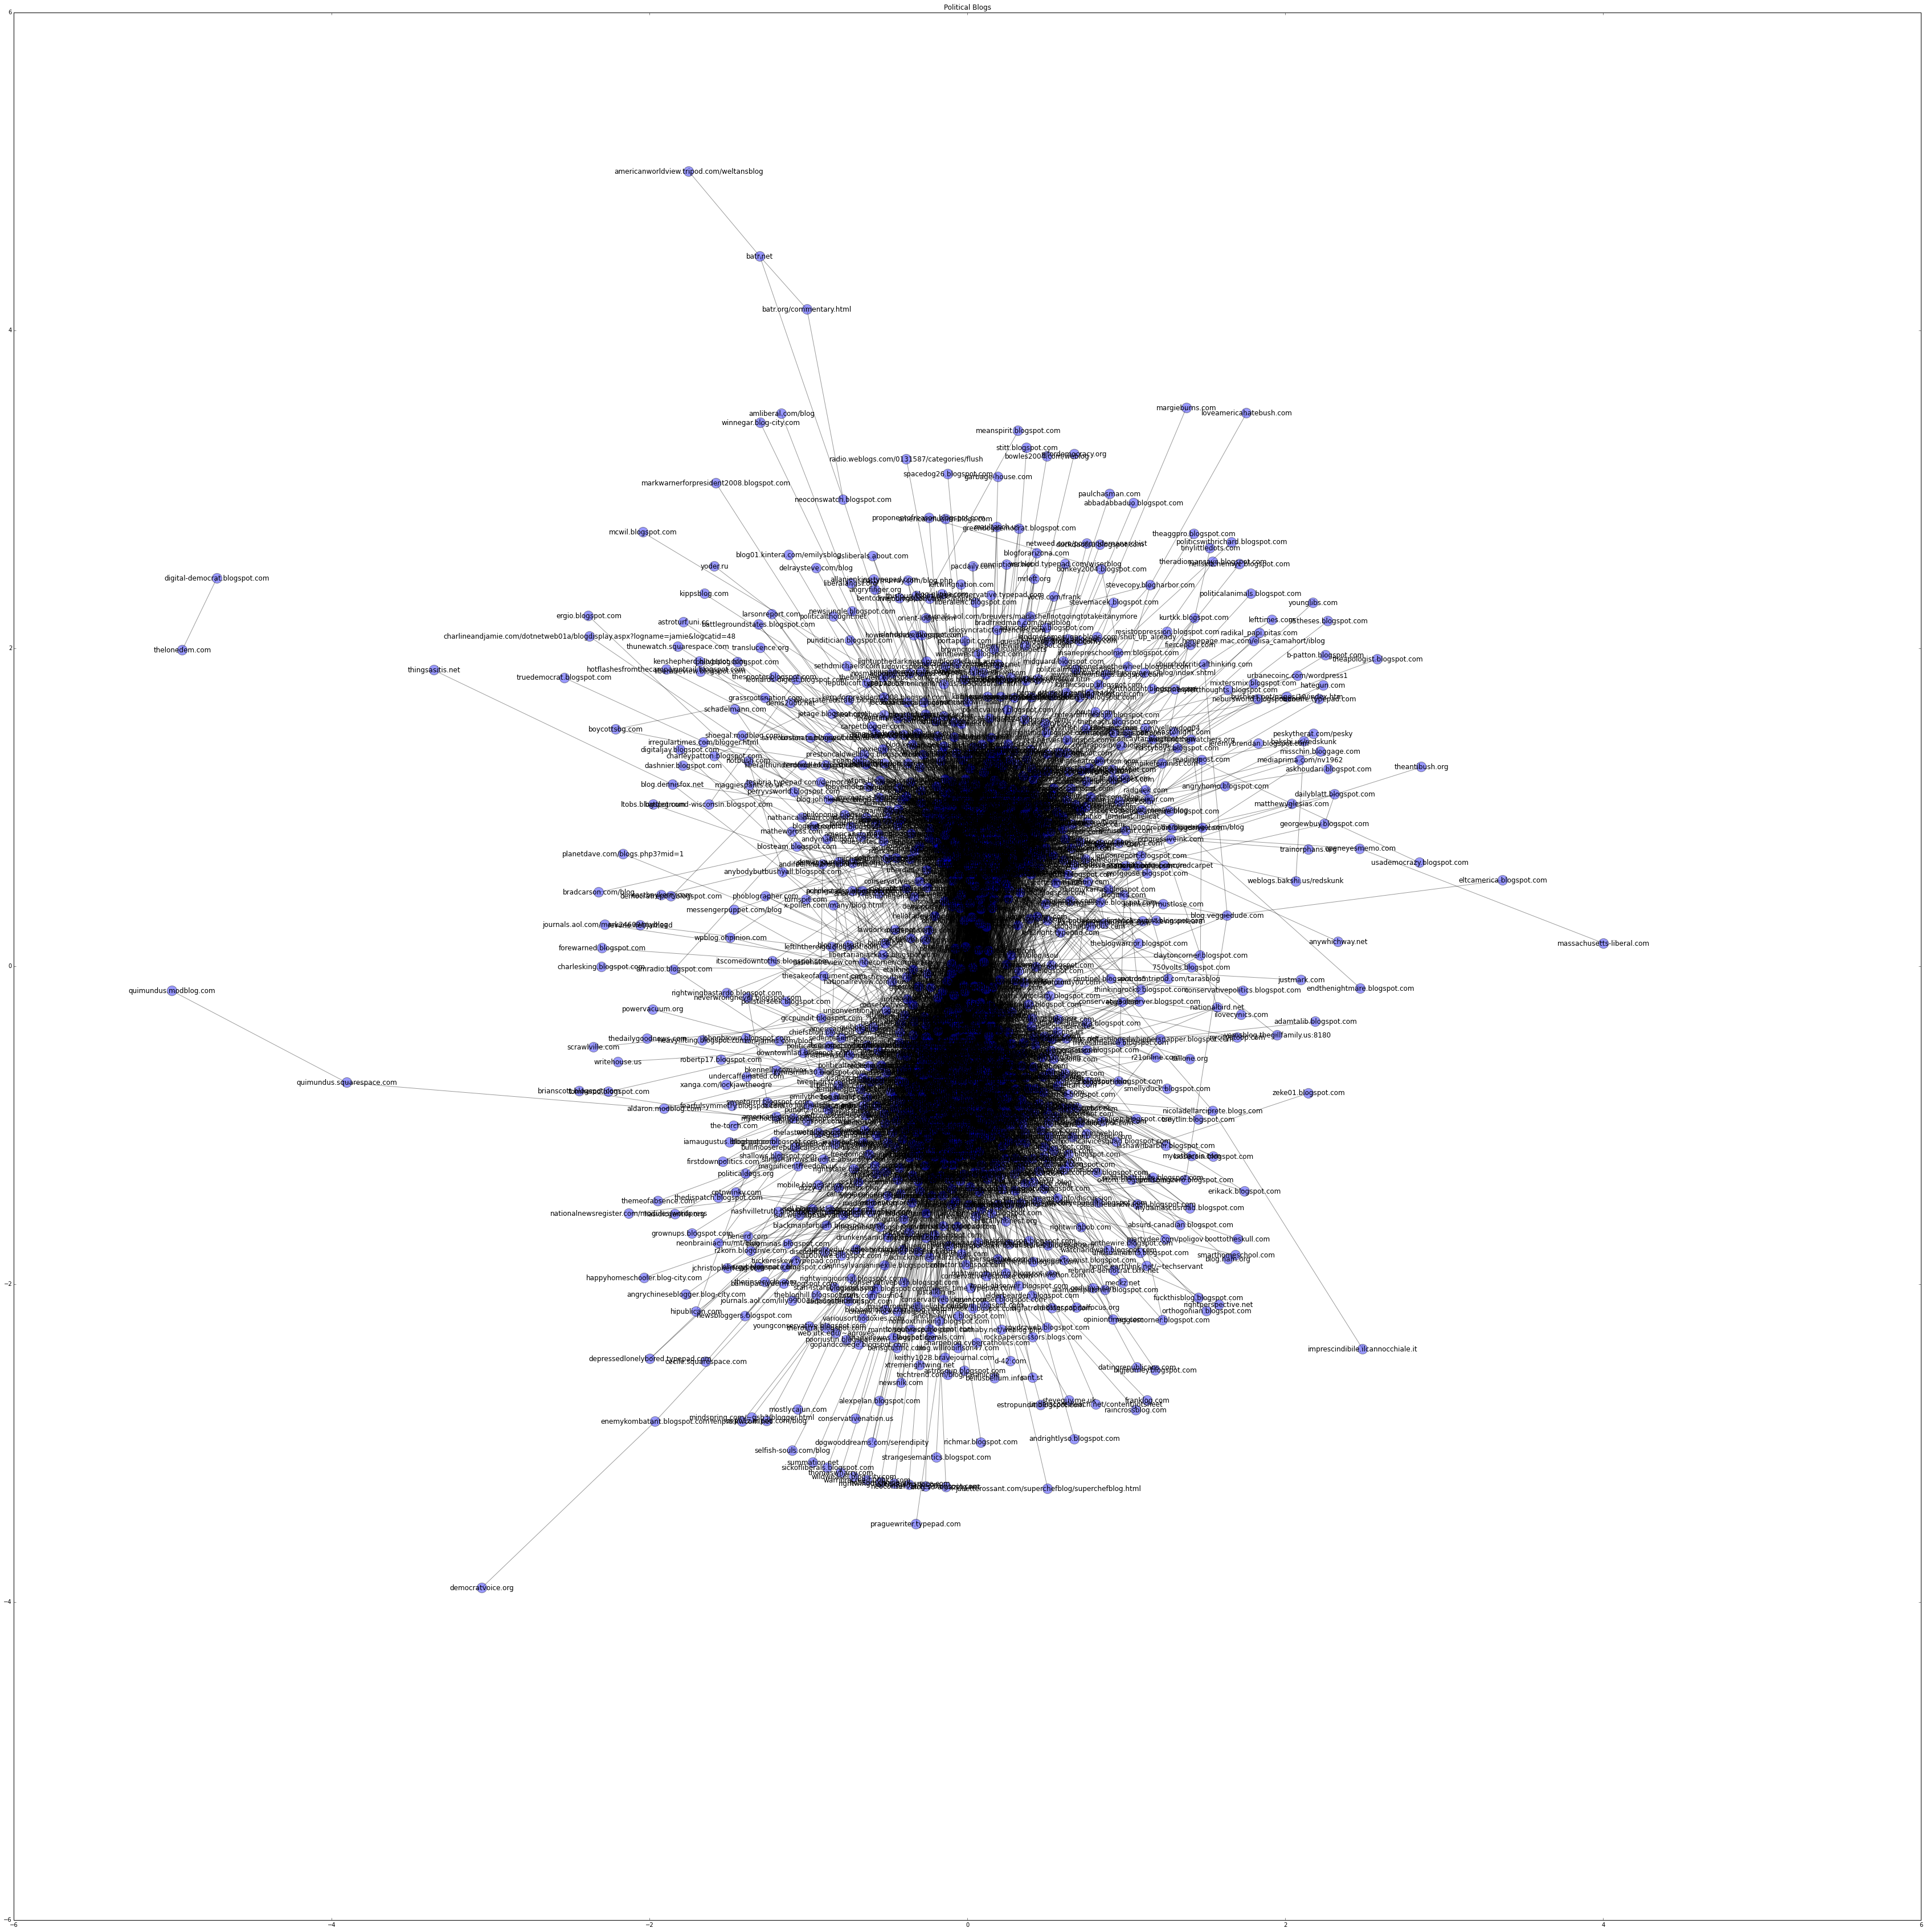

In [6]:
plt.figure(figsize=(60,60))
pos=nx.spring_layout(G, iterations=500, scale=5, k=1)
nx.draw_networkx_labels(G,pos,fontsize=8)
plt.title("Political Blogs")
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('on')
plt.show()

### 2.  What are the 10 most influential blogs?

In [7]:
blog = nx.eigenvector_centrality_numpy(G)

In [8]:
List = []
for node in blog:
    List.append((node,blog[node]))

In [9]:
output =sorted(List, key=lambda x: x[1], reverse=True)
output[0:10]

[(u'atrios.blogspot.com', 0.1948229589885676),
 (u'dailykos.com', 0.1609071638581871),
 (u'washingtonmonthly.com', 0.1465405046383645),
 (u'digbysblog.blogspot.com', 0.1426558225197867),
 (u'bodyandsoul.typepad.com', 0.1411485353128889),
 (u'liberaloasis.com', 0.13953785666658583),
 (u'tbogg.blogspot.com', 0.13704857535546858),
 (u'corrente.blogspot.com', 0.12943073134224983),
 (u'talkingpointsmemo.com', 0.1270093107829416),
 (u'dneiwert.blogspot.com', 0.1223870390063801)]

### 3.  What are the 10 least influential blogs?



In [10]:
output=sorted(List, key=lambda x: x[1])
output[0:10]

[(u'digital-democrat.blogspot.com', -4.734478670538882e-19),
 (u'thelonedem.com', 1.7111612316107421e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.489792407555196e-09),
 (u'quimundus.modblog.com', 6.675725344835385e-08),
 (u'batr.org/commentary.html', 6.794245454800446e-07),
 (u'batr.net', 6.795053204386384e-07),
 (u'democratvoice.org', 1.0221602317225705e-06),
 (u'quimundus.squarespace.com', 6.056497487441814e-06),
 (u'massachusetts-liberal.com', 9.484711746613928e-06),
 (u'thingsasitis.net', 1.1737028626601086e-05)]